## JES

In [43]:
import pandas as pd
import selection
import importlib
import numpy as np
import matplotlib.pyplot as plt

In [73]:
importlib.reload(selection)
df, jets, event_counts = selection.event_selection("/eos/user/l/llayer/opendata_files/preselection_merged/TTJets.root", isTT=True, corrLevel='centJER') 

Processing: TTJets.root isData: False isTT: True corrLevel centJER
SF 1.0 1.0


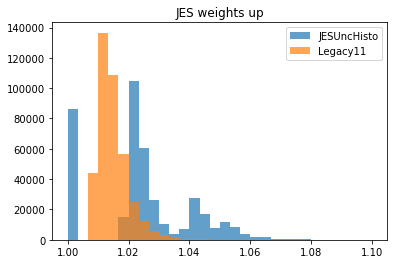

In [86]:
plt.hist(jets.jes_up_old.flatten(), bins=30, range=(1.,1.1), alpha=0.7, label="JESUncHisto")
plt.hist(jets.jes_up.flatten(), bins=30, range=(1.,1.1), alpha=0.7, label="Legacy11")
plt.title("JES weights up")
plt.legend(loc="upper right")

## JES hist legacy

In [6]:
from coffea.lookup_tools import extractor

In [7]:
ext = extractor()
ext.add_weight_sets([
    "* * data/Legacy11_V1_DATA_UncertaintySources_AK5PFchs.junc.txt",
    "* * jer_sf.root",
    "* * JESUncMC.root"
])
ext.finalize()
evaluator = ext.make_evaluator()

In [53]:
eta = np.linspace(-2.4, 2.4, num=500)
pt = np.linspace(40., 300., num=500)

In [54]:
jes = np.zeros((500,500))

In [55]:
evaluator['Legacy11_V1_DATA_UncertaintySources_AK5PFchs_Total'](np.array([2.]), np.array([100.]))[0][0]

1.01423

In [56]:
for i in range(len(eta)):
    for j in range(len(pt)):
        jes[i,j] = evaluator['Legacy11_V1_DATA_UncertaintySources_AK5PFchs_Total'](np.array([eta[i]]), np.array([pt[j]]))[0][0]
        

In [57]:
jes = jes - 1.

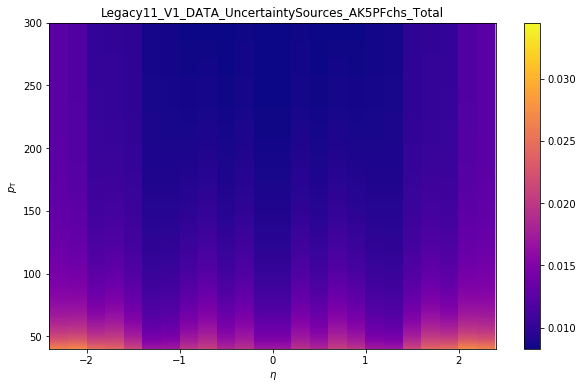

In [59]:
extent = [eta[0], eta[-1], pt[0], pt[-1]]
#print np.max(eff)

fig, ax = plt.subplots(figsize=(10, 6))
#plt.clf()
#plt.tight_layout()
#plt.figure(figsize=(8,6))
im = ax.imshow(jes.T, extent=extent, cmap='plasma', aspect='auto', origin='lower',interpolation='none')
#im = ax.imshow(jes.T, cmap='plasma', aspect='auto', origin='lower',interpolation='none')
plt.ylabel(r'$p_\mathrm{T}$')
plt.xlabel(r'$\eta$')
# Add a colorbar
#im = ax.imshow(eff, interpolation='nearest')
fig.colorbar(im, ax=ax)
plt.title("Legacy11_V1_DATA_UncertaintySources_AK5PFchs_Total")
plt.show()

## JES old

In [69]:
jes_old = np.zeros((500,500))

In [70]:
jes_old.shape

(500, 500)

In [71]:
for i in range(len(eta)):
    for j in range(len(pt)):
        jes_old[i,j] = np.array(evaluator['JESUncHisto'](eta[i], pt[j]))

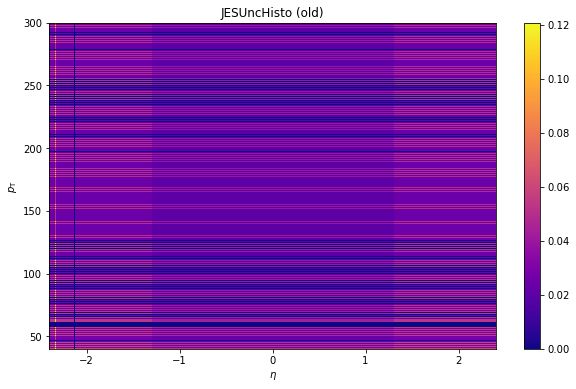

In [72]:
fig, ax = plt.subplots(figsize=(10, 6))
#plt.clf()
#plt.tight_layout()
#plt.figure(figsize=(8,6))
im = ax.imshow(jes_old.T, extent=extent, cmap='plasma', aspect='auto', origin='lower',interpolation='none')
#im = ax.imshow(jes.T, cmap='plasma', aspect='auto', origin='lower',interpolation='none')
plt.ylabel(r'$p_\mathrm{T}$')
plt.xlabel(r'$\eta$')
# Add a colorbar
#im = ax.imshow(eff, interpolation='nearest')
fig.colorbar(im, ax=ax)
plt.title("JESUncHisto (old)")
plt.show()